In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/jqjunk/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### I'd like to understand some relationships between AGI and other variables since wealth inequality and its effects interest me.

### First, get the data and put it into a form that I can use for this analysis.

In [4]:
# get the demographic data
acs_pop_demog = pd.DataFrame.from_csv('acs_population_demographics.csv')
acs_pop_demog.head()

,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Total; Estimate; AGE - 10 to 14 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
ZIP,,,,,,,,,,,,,,,,,,,,,
601,18088,8824,9264,5.8,5.9,5.6,6.3,6.6,6.1,7.4,...,1.8,1.5,2.1,37.1,36.2,38.9,95.3,63.8,24.2,39.7
602,40859,20079,20780,5.2,5.4,5.0,6.2,6.4,6.1,6.1,...,1.5,1.1,1.9,39.0,38.5,39.7,96.6,56.5,21.9,34.6
603,53162,25971,27191,5.3,5.6,5.0,6.4,6.8,6.0,6.2,...,1.3,0.7,1.8,39.2,37.4,40.8,95.5,64.4,28.0,36.5
606,6415,3188,3227,5.7,8.5,2.9,5.8,6.2,5.4,7.2,...,2.6,2.5,2.7,39.2,37.7,39.6,98.8,62.9,24.6,38.4
610,28805,13958,14847,5.2,5.4,5.1,5.4,5.4,5.4,7.3,...,1.5,1.5,1.5,39.7,36.8,41.3,94.0,62.5,26.0,36.6


In [6]:
# get the IRS data
irs_pub_data = pd.DataFrame.from_csv('irs_public_data.csv')
irs_pub_data[:10]

,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
STATE,,,,,,,,,,,,
AL,0,1,870380,488030,122290,247000,500770,1452580,571240,11255896,767170,2005593
AL,0,2,490960,195840,155230,125280,286130,1027850,383240,17632481,418070,1192755
AL,0,3,258810,72710,146880,32860,157670,594910,189340,15916085,194360,552938
AL,0,4,163290,24860,126480,9790,98920,424160,134370,14161207,116830,385953
AL,0,5,192050,16930,168170,5450,115290,538120,177800,25777351,110760,441951
AL,0,6,46890,3530,42190,860,36250,137410,48270,20346741,14840,252825
AL,35004,1,1530,950,260,300,800,2250,710,19524,1310,2734
AL,35004,2,1330,590,410,270,680,2600,860,48895,1140,2998
AL,35004,3,910,290,490,110,450,2020,620,55761,720,1974


In [7]:
zip_indexed_irs = irs_pub_data.set_index('zipcode')

In [18]:
# get rid of rows where we don't know the zip code
zip_indexed_irs.drop([0], inplace=True)
zip_indexed_irs[:20]

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
zipcode,,,,,,,,,,,
35004,1,1530,950,260,300,800,2250,710,19524,1310,2734
35004,2,1330,590,410,270,680,2600,860,48895,1140,2998
35004,3,910,290,490,110,450,2020,620,55761,720,1974
35004,4,610,90,490,40,300,1630,530,52579,500,1561
35004,5,510,40,460,0,260,1420,450,63848,340,1355
35004,6,40,0,40,0,40,110,30,14927,0,0
35005,1,1390,800,190,380,810,2290,860,18686,1270,3259
35005,2,1030,360,300,350,580,2170,850,36725,900,2627
35005,3,470,140,230,100,290,1040,340,28531,360,1002


In [19]:
# group the zip codes so we can get aggregate data for each zip code
grouped_by_zip = zip_indexed_irs.groupby(level=0)
grouped_by_zip.get_group(35006)

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
zipcode,,,,,,,,,,,
35006,1,440,250,110,70,270,700,200,5410,390,784
35006,2,330,110,150,70,230,710,230,11857,290,829
35006,3,190,40,130,30,130,480,160,11806,170,497
35006,4,130,20,110,0,100,360,130,10887,100,369
35006,5,140,0,130,0,100,410,140,18342,90,327
35006,6,0,0,0,0,0,0,0,0,0,0


In [24]:
# sum up the data for each income bracket to get aggregate data for each zip code
aggregated_by_zip = grouped_by_zip.aggregate(np.sum)
aggregated_by_zip.head()

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
zipcode,,,,,,,,,,,
1001,21,8780,4750,3030,870,4970,15140,4000,471936,6910,16058
1002,21,9570,5140,3530,770,4750,16590,4440,744429,6560,16028
1005,21,2230,1050,980,190,1230,4270,1240,127991,1730,4188
1007,21,7300,3350,3280,570,3810,14060,4210,481692,5720,14385
1008,21,640,280,320,40,370,1200,290,38311,480,1172


In [25]:
# associate population with zip codes in tax data
aggregated_by_zip['population'] = acs_pop_demog['Total; Estimate; Total population']
aggregated_by_zip.head()

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds,population
zipcode,,,,,,,,,,,,
1001,21,8780,4750,3030,870,4970,15140,4000,471936,6910,16058,17141.0
1002,21,9570,5140,3530,770,4750,16590,4440,744429,6560,16028,29844.0
1005,21,2230,1050,980,190,1230,4270,1240,127991,1730,4188,5113.0
1007,21,7300,3350,3280,570,3810,14060,4210,481692,5720,14385,14774.0
1008,21,640,280,320,40,370,1200,290,38311,480,1172,1212.0


In [38]:
# making sure the association worked properly--the population of zip 1001 should be same in both this row and
# the corresponding row in the above dataframe
acs_pop_demog.drop([zip for zip in acs_pop_demog.index if zip != 1001])

,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,Total; Estimate; AGE - 10 to 14 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
ZIP,,,,,,,,,,,,,,,,,,,,,
1001,17141,7909,9232,5.9,7.6,4.4,4.1,5.0,3.4,5.4,...,4.6,1.9,6.9,44.3,40.5,46.5,85.7,62.5,31.6,30.9


In [39]:
aggregated_by_zip['agi_per_capita'] = aggregated_by_zip['amount_agi'] / aggregated_by_zip['population']
aggregated_by_zip.head()

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds,population,agi_per_capita
zipcode,,,,,,,,,,,,,
1001,21,8780,4750,3030,870,4970,15140,4000,471936,6910,16058,17141.0,27.532583
1002,21,9570,5140,3530,770,4750,16590,4440,744429,6560,16028,29844.0,24.944009
1005,21,2230,1050,980,190,1230,4270,1240,127991,1730,4188,5113.0,25.032466
1007,21,7300,3350,3280,570,3810,14060,4210,481692,5720,14385,14774.0,32.604034
1008,21,640,280,320,40,370,1200,290,38311,480,1172,1212.0,31.609736


### The per capita number seems too low.. next two lines are to verfiy that the summing over zip code procedure worked properly.  Apparently it did work. 

In [41]:
zip_indexed_irs.drop([zip for zip in zip_indexed_irs.index if zip != 35004])

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
zipcode,,,,,,,,,,,
35004,1,1530,950,260,300,800,2250,710,19524,1310,2734
35004,2,1330,590,410,270,680,2600,860,48895,1140,2998
35004,3,910,290,490,110,450,2020,620,55761,720,1974
35004,4,610,90,490,40,300,1630,530,52579,500,1561
35004,5,510,40,460,0,260,1420,450,63848,340,1355
35004,6,40,0,40,0,40,110,30,14927,0,0


In [42]:
aggregated_by_zip.drop([zip for zip in aggregated_by_zip.index if zip != 35004])

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds,population,agi_per_capita
zipcode,,,,,,,,,,,,,
35004,21,4930,1960,2150,720,2530,10030,3200,255534,4010,10622,9759.0,26.184445


### I suspect that the amount_agi is in thousands of dollars. I will proceed on this basis. So my per capita AGI is also in thousands of dollars.  Let's see some plots of demographic variables against the per capita AGI in zip codes to see if we can find any relationships. Since AGI is likely closely related to wealth, this is an interesting set of relationships to look at. 

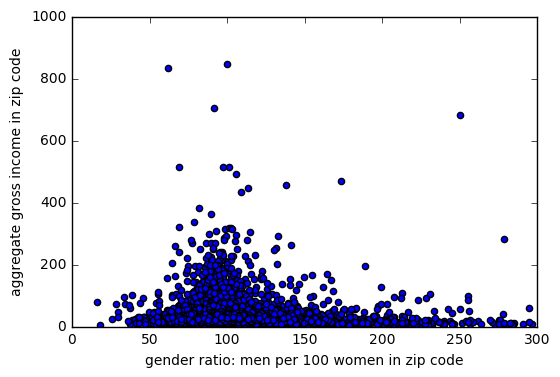

In [58]:
aggregated_by_zip['gender_ratio'] = acs_pop_demog['Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females)']
plt.scatter(aggregated_by_zip['gender_ratio'], aggregated_by_zip['agi_per_capita'])
# ignoring a few outliers by setting the bounds of the graph we will look at
plt.ylim(0, 1000)
plt.xlim(0,300)
plt.xlabel('gender ratio: men per 100 women in zip code')
plt.ylabel('aggregate gross income in zip code')
plt.show()

### Seems from the plot like maybe there is a positive correlation between AGI and a balanced gender ratio (100 men per 100 women), but that apparent relationship could simply be the result of there being more zip codes with a close-to-balanced ratio, thus increasing the chances that there are high income zip codes in that group purely by having a high prior.  To figure out whether there is a relationship, I'll make a measure of balanced-ness and see if there's a positive correlation.

In [59]:
# just checking to see if there's a simple correlation between wealth and gender ratio--there isn't
aggregated_by_zip['gender_ratio'].corr(aggregated_by_zip['agi_per_capita'])

-0.016968222546620011

### Appears to be basically no correlation between these variables. Maybe we could see a clearer signal by removing the outliers.  There were some odd outliers in the gender ratio column (see cell below).

In [60]:
# create a male-female ratio series
male_female_ratio = aggregated_by_zip['gender_ratio'].apply(lambda x: x / 100)
male_female_ratio.describe()

count    27680.000000
mean         1.020385
std          0.445340
min          0.160000
25%               NaN
50%               NaN
75%               NaN
max         54.625000
Name: gender_ratio, dtype: float64

In [62]:
# balanced ratio = 1; create distance from balanced series
distance_from_balanced = male_female_ratio.apply(lambda x: np.abs(1 - x))
distance_from_balanced.describe()

count    27680.000000
mean         0.122284
std          0.428707
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max         53.625000
Name: gender_ratio, dtype: float64

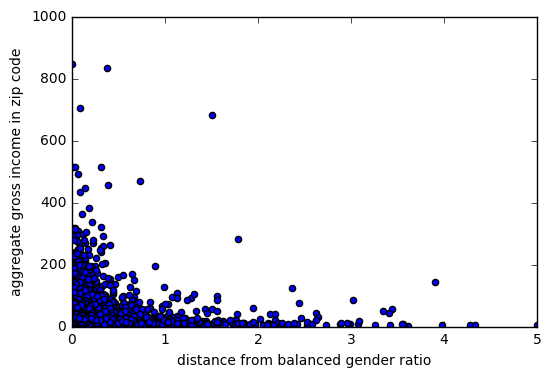

In [63]:
plt.scatter(distance_from_balanced, aggregated_by_zip['agi_per_capita'])
# ignoring a few outliers by setting the bounds of the graph we will look at
plt.ylim(0, 1000)
plt.xlim(0,5)
plt.xlabel('distance from balanced gender ratio')
plt.ylabel('aggregate gross income in zip code')
plt.show()

In [64]:
# looks from the plot like there could be a negative correlation between AGI and distance from balanced ratio,
# but it could still be that crowding effect. Let's see if there is a correlation:
distance_from_balanced.corr(aggregated_by_zip['agi_per_capita'])

-0.0081455263018005656

### From the above, I'd say we are not seeing a discernable relationship between AGI and gender ratio.  Let's try a different demographic and see if there's a relationship to AGI

### Let's see if there is a relationship between AGI and child dependency ratio

In [68]:
AGI = aggregated_by_zip['agi_per_capita']
AGI.head()

zipcode
1001    27.532583
1002    24.944009
1005    25.032466
1007    32.604034
1008    31.609736
Name: agi_per_capita, dtype: float64

In [74]:
aggregated_by_zip['child_dep_ratio'] = acs_pop_demog['Total; Estimate; SUMMARY INDICATORS - Child dependency ratio']
aggregated_by_zip.head()

,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds,population,agi_per_capita,gender_ratio,child_dep_ratio
zipcode,,,,,,,,,,,,,,,
1001,21,8780,4750,3030,870,4970,15140,4000,471936,6910,16058,17141.0,27.532583,85.7,30.9
1002,21,9570,5140,3530,770,4750,16590,4440,744429,6560,16028,29844.0,24.944009,95.8,16.4
1005,21,2230,1050,980,190,1230,4270,1240,127991,1730,4188,5113.0,25.032466,115.3,44.0
1007,21,7300,3350,3280,570,3810,14060,4210,481692,5720,14385,14774.0,32.604034,98.3,38.8
1008,21,640,280,320,40,370,1200,290,38311,480,1172,1212.0,31.609736,105.8,28.0


In [75]:
# looks like there might be some relationship here. The magnitude of this effect may be masked by the fact that the 
# child dependcy ratio varies a small amount around a larger value between 30 and 40 (see cell below)
AGI.corr(aggregated_by_zip['child_dep_ratio'])

-0.095577366837264768

### let's look at the relationship on a graph

In [104]:
aggregated_by_zip['child_dep_ratio'].describe()

count    27563.000000
mean        37.514661
std         11.897856
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max        263.900000
Name: child_dep_ratio, dtype: float64

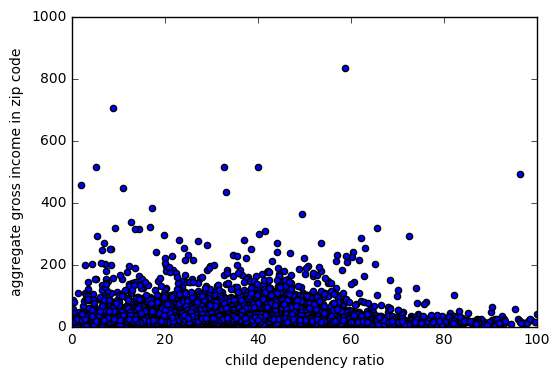

In [105]:
plt.scatter(aggregated_by_zip['child_dep_ratio'], aggregated_by_zip['agi_per_capita'])
# ignoring a few outliers by setting the bounds of the graph we will look at
plt.ylim(0, 1000)
plt.xlim(0,100)
plt.xlabel('child dependency ratio')

plt.ylabel('aggregate gross income in zip code')
plt.show()

### seems from the plot that there's no real effect here either

### So, we've ruled out two possible relationships in the data. Next steps might be to try a combination of factors by selecting some features likely to affect AGI per capita in a zip code and train a linear regression model using scikitlearn. I am, however, out of time.